In [47]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('income.csv')
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


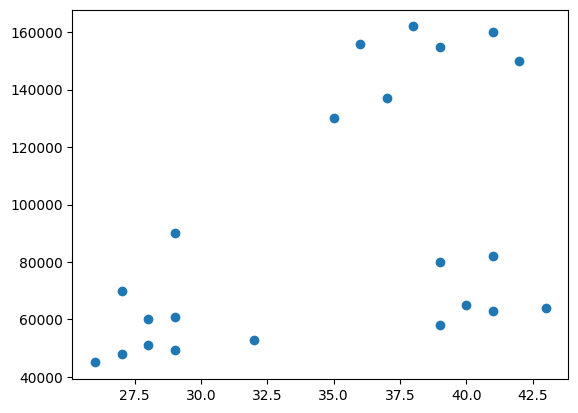

In [49]:
plt.scatter(df.Age, df['Income($)'])

In [50]:
km = KMeans(n_clusters= 3)

In [51]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [52]:
df['cluster'] = y_pred
df.head(3)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


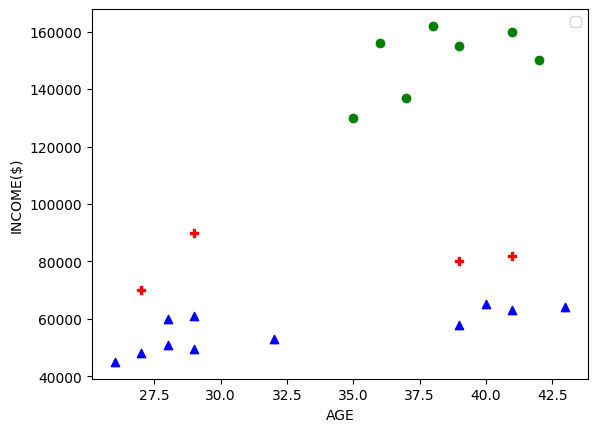

In [53]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3= df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'r', marker='P')
plt.scatter(df2.Age, df2['Income($)'], color = 'g', marker='o')
plt.scatter(df3.Age, df3['Income($)'], color = 'b', marker='^')
plt.xlabel('AGE')
plt.ylabel('INCOME($)')
plt.legend()

In [54]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])

In [55]:
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [56]:
km = KMeans(n_clusters= 3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [57]:
df.drop('cluster', axis = 'columns', inplace= True)

In [58]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [59]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


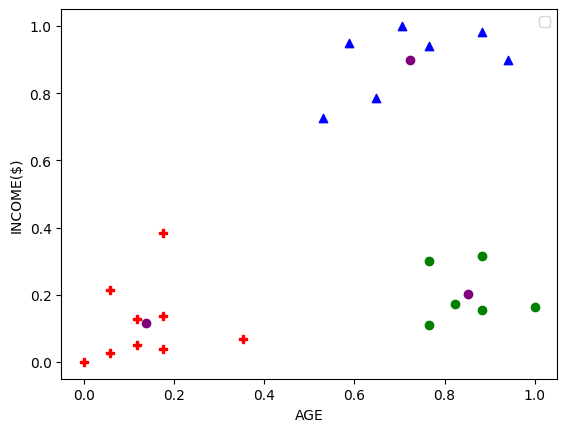

In [60]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3= df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'r', marker='P')
plt.scatter(df2.Age, df2['Income($)'], color = 'g', marker='o')
plt.scatter(df3.Age, df3['Income($)'], color = 'b', marker='^')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= "purple", marker="o")
plt.xlabel('AGE')
plt.ylabel('INCOME($)')
plt.legend()

In [61]:
k_rng = range(1,10)
sse = []
for k in k_rng  :
    km =KMeans(n_clusters= k)
    km.fit(df[['Age', "Income($)"]])
    sse.append(km.inertia_)
sse

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472493,
 0.17796706251738348,
 0.13265419827245162,
 0.10383752586603562]

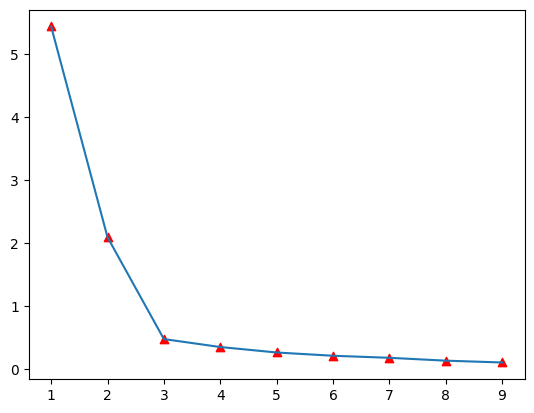

In [62]:
plt.plot(k_rng, sse)
plt.scatter(k_rng, sse, color= 'r', marker='^')